# **Data Preprocessing**

In [1]:
WEIGHTS_V = 23

## *Select Classes*

In [14]:
import pandas as pd
import os
import cv2
import numpy as np

In [3]:
data_path = "../../data/Datasets"

train_labels = pd.read_csv(os.path.join(data_path,"train_labels.csv"),names=['sample','id'])
validation_labels = pd.read_csv(os.path.join(data_path,"validation_labels.csv"),names=['sample','id'])
test_labels = pd.read_csv(os.path.join(data_path,"test_labels.csv"),names=['sample','id'])
class_id = pd.read_csv(os.path.join(data_path,"class_id.csv"))


train_path = os.path.join(data_path,"train")
val_path = os.path.join(data_path,"val")
test_path = os.path.join(data_path,"test")

In [4]:
def check_file(file_path):
    try:
        f = open(file_path)
        f.close()
        return True
    except IOError:
        return False
    
def construct_path(file,path="train"):
    return os.path.join(os.path.join(data_path,path),file+"_color.mp4")

In [5]:
n_classes = 3
actions = list(class_id['EN'][:n_classes])
dic={}
for i,action in enumerate(actions):
    dic[action]=i

In [6]:
def get_data(id,file_path):
    if file_path=="train":
        label_dic = train_labels
    elif file_path=="val":
        label_dic = validation_labels
    elif file_path=="test":
        label_dic = test_labels
        
    
    data =  label_dic[label_dic['id']==id]
    lis =  [construct_path(i,file_path) for i in  (data['sample'])]
    data =  [i for i in lis if check_file(i)]
    return data,[id for i in data]

In [7]:
train_X = [] 
train_Y = []
val_X = [] 
val_Y = []
test_X = [] 
test_Y = []

for i in range(n_classes):
    data,labels = get_data(i,'train')
    train_X.extend(data)
    train_Y.extend(labels)

    
for i in range(n_classes):
    data,labels = get_data(i,'val')
    val_X.extend(data)
    val_Y.extend(labels)

    
for i in range(n_classes):
    data,labels = get_data(i,'test')
    test_X.extend(data)
    test_Y.extend(labels)

In [78]:
video_path = train_X[0]
def_input_path = "..\\Datasets\\AUTSL\\train\\"
video_path[len(def_input_path):-4]

'n/signer0_sample431_color'

## my Test Videos

In [8]:
import os
my_data_path = "../../data/my_data"

my_test_X  = []
my_test_Y = []

for key,value in dic.items():
    data =  os.listdir(os.path.join(my_data_path,key))
    data = [os.path.join(my_data_path,key,i) for i in data]
    labels = [value for i in range(len(data))]
    my_test_X.extend(data)
    my_test_Y.extend(labels)

## *Prepare Videos*

In [35]:
import os
import cv2
import numpy as np

In [9]:
def get_frames(video_path, n_frames=1):
    frames = []
    v_cap = cv2.VideoCapture(video_path)
    v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT)) + 1
    frame_list = np.linspace(0, v_len-1, n_frames+1, dtype=np.int16)

    for fn in range(60):
        success, frame = v_cap.read()
        if success == False:
            continue
        if fn in frame_list:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame)
    v_cap.release()
    return frames, v_len

def store_frames(frames, path_to_store):
    for i, frame in enumerate(frames):
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        path = os.path.join(path_to_store, "frame"+str(i)+".jpg")
        cv2.imwrite(path, frame)


In [10]:
my_data_path

'../../data/my_data'

In [45]:
get_paths("train")

('../../data/Datasets/train/', 'FinalData/train')

In [62]:
def get_paths(folder,output_path_only=False):
    # output_path: path to store video's frames "train, val, test"
    # input_path: path that contains dataset folders "train, val, test"
    output_path = os.path.join("FinalData",folder)
    if output_path_only:
        return output_path
    def_input_path = f"../../data/Datasets/{folder}/"
    return def_input_path, output_path



def get_file_name(file):
    return file.split("/")[-1].split(".")[0]

def create_dir(name):
    try:
        os.mkdir(name)
    except:
        pass
    return name

    

    

    
    
output_path = os.path.join("FinalData","my_test")
my_data_path = "../../data/my_data"

# # the 3 actions
# for key,value in dic.items():
#     data =  os.listdir(os.path.join(my_data_path,key))
#     out_dir_path = create_dir(os.path.join(output_path,str(value)))
    
#     for i,video in enumerate(data):
#         video_name = get_file_name(video)
        
        
#         frames = os.path.join(my_data_path,key,video)
#         frames,v_len = get_frames(frames,16)
        
        
#         frame_dir = create_dir(os.path.join(out_dir_path,video_name))
        
#         store_frames(frames,frame_dir)
        

my_updated_train_X = []

for i,video in enumerate(my_test_X):
    label = my_test_Y[i]
    
    video_name = get_file_name(video)
    my_updated_train_X.append(video_name)
    out_dir_path = create_dir(os.path.join(output_path,str(label),video_name))
    
    frames,v_len = get_frames(video,16)
    store_frames(frames,out_dir_path)
        
        
    
    
    

    
    



folders = ["train", "val", "test"]
for folder in folders:
    def_input_path, output_path = get_paths(folder)
    working_list_X = None
    working_list_Y = None
    if folder == "train":
        working_list_X = train_X
        working_list_Y = train_Y
    elif folder == "val":
        working_list_X = val_X
        working_list_Y = val_Y
    else:
        working_list_X = test_X
        working_list_Y = test_Y
    
    size = len(working_list_X)    
    for i in range(size):
        video_path = working_list_X[i]
        label = working_list_Y[i]
        working_list_X[i] = working_list_X[i][len(def_input_path):-4]
#         video_name = video_path[len(def_input_path):-4]
#         path_to_store = os.path.join(output_path, str(label))
#         if not os.path.exists(path_to_store):
#             os.mkdir(path_to_store)
#         path_to_store = os.path.join(path_to_store, video_name)
#         if not os.path.exists(path_to_store):
#             os.mkdir(path_to_store)
#             frames, v_len = get_frames(video_path, n_frames=16)
#             store_frames(frames=frames, path_to_store=path_to_store)


# **Dataset**

## *Build Dataset Class*

In [17]:
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import numpy as np
import random

In [18]:
import re
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

In [19]:
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

def denormalize(x_, mean, std):
    x = x_.clone()
    for i in range(3):
        x[i] = x[i]*std[i]+mean[i]
    x = to_pil_image(x)        
    return x

In [50]:
sorted_alphanumeric(os.listdir(os.path.join(get_paths("train",True),"0","signer0_sample431_color")))

['frame0.jpg',
 'frame1.jpg',
 'frame2.jpg',
 'frame3.jpg',
 'frame4.jpg',
 'frame5.jpg',
 'frame6.jpg',
 'frame7.jpg',
 'frame8.jpg',
 'frame9.jpg',
 'frame10.jpg',
 'frame11.jpg',
 'frame12.jpg',
 'frame13.jpg',
 'frame14.jpg',
 'frame15.jpg']

In [64]:
np.random.seed(2020)
random.seed(2020)
torch.manual_seed(2020)

class VideoDataset(Dataset):
    def __init__(self, imgs_name, labels, folder="train", transform = None):
        super(VideoDataset, self).__init__()
        self.labels = labels
        self.transform = transform

        input_path = get_paths(folder=folder, output_path_only=True)
        self.imgs_path = []
        for img_name, label in zip(imgs_name, labels):
            img_path = os.path.join(input_path, str(label))
            img_path = os.path.join(img_path, img_name)
            self.imgs_path.append(img_path)
        
    
    def __len__(self):
        return len(self.imgs_path)

    def __getitem__(self, idx):
        imgs = os.listdir(self.imgs_path[idx])
        imgs = sorted_alphanumeric(imgs)
        frames = []
        for img in imgs:
            img_path = os.path.join(self.imgs_path[idx], img)
            frame = Image.open(img_path)
            frames.append(frame)
        
        seed = np.random.randint(1e9)
        if self.transform:
            for i in range(len(frames)):
                random.seed(seed)
                np.random.seed(seed)
                frames[i] = self.transform(frames[i])
        if len(frames) > 0:
            frames = torch.stack(frames)

        return frames, self.labels[idx]


# **Models**

## *Utils*

In [21]:
import copy

In [22]:
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']

In [23]:
def metrics_batch(output, target):
    pred = output.argmax(dim=1, keepdim=True)
    corrects = pred.eq(target.view_as(pred)).sum().item()
    return corrects

In [24]:
def loss_batch(loss_func, output, target, opt=None):
    loss = loss_func(output, target)
    with torch.no_grad():
        metric_b = metrics_batch(output, target)
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()
    return loss.item(), metric_b

In [74]:
def loss_epoch(model, loss_func, dataset_dl, opt=None):
    running_loss=0.0
    running_metric=0.0
    len_data = len(dataset_dl.dataset)
    model = model.to(device)
    for xb, yb in dataset_dl:
        xb=xb.to(device)
        yb=yb.to(device)
        output=model(xb)
        loss_b, metric_b = loss_batch(loss_func, output, yb, opt)
        running_loss += loss_b
        
        if metric_b is not None:
            running_metric += metric_b

    loss = running_loss/float(len_data)
    metric = running_metric/float(len_data)
    return loss, metric

In [26]:
def train_val(model, num_epochs, loss_func, opt, train_dl, val_dl, lr_scheduler, path_to_weights):   
    loss_history={
        "train": [],
        "val": [],
    }
    
    metric_history={
        "train": [],
        "val": [],
    }
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss=float('inf')
    
    for epoch in range(num_epochs):
        current_lr=get_lr(opt)
        print('Epoch {}/{}, current lr={}'.format(epoch, num_epochs - 1, current_lr))
        model.train()
        train_loss, train_metric = loss_epoch(model, loss_func, train_dl, opt)
        loss_history["train"].append(train_loss)
        metric_history["train"].append(train_metric)
        model.eval()
        with torch.no_grad():
            val_loss, val_metric = loss_epoch(model, loss_func, val_dl)
        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            torch.save(model.state_dict(), path_to_weights)
            print("Copied best model weights!")
        
        loss_history["val"].append(val_loss)
        metric_history["val"].append(val_metric)
        
        lr_scheduler.step(val_loss)
        if current_lr != get_lr(opt):
            print("Loading best model weights!")
            model.load_state_dict(best_model_wts)
        

        print("train loss: %.6f, train_accuracy: %.2f, val_loss: %.6f, val_accuracy: %.2f" %(train_loss, 100*train_metric, val_loss, 100*val_metric))
        print("-"*10) 
    model.load_state_dict(best_model_wts)
        
    return model, loss_history, metric_history

In [27]:
def plot_loss(loss_hist, metric_hist):

    num_epochs= len(loss_hist["train"])

    plt.title("Train-Val Loss")
    plt.plot(range(1,num_epochs+1),loss_hist["train"],label="train")
    plt.plot(range(1,num_epochs+1),loss_hist["val"],label="val")
    plt.ylabel("Loss")
    plt.xlabel("Training Epochs")
    plt.legend()
    plt.show()

    plt.title("Train-Val Accuracy")
    plt.plot(range(1,num_epochs+1), metric_hist["train"],label="train")
    plt.plot(range(1,num_epochs+1), metric_hist["val"],label="val")
    plt.ylabel("Accuracy")
    plt.xlabel("Training Epochs")
    plt.legend()
    plt.show()

## *Build Models*

#### **1. Conv3D**

In [28]:
import os

import torch
import torch.nn as nn
import torchvision

In [29]:
def convert_relu_to_swish(model: nn.Module):
    for child_name, child in model.named_children():
        if isinstance(child, nn.ReLU):
            setattr(model, child_name, nn.SiLU(True))
        else:
            convert_relu_to_swish(child)


In [30]:
class Swish(nn.Module):
    def __init(self):
        super().__init__()

    def forward(self, x):
        return x.mult_(torch.sigmoid(x))

In [31]:
class r2plus1d_18(nn.Module):
    def __init__(self, pretrained=True, n_classes=226, dropout_p=0.5):
        super(r2plus1d_18, self).__init__()
        self.pretrained = pretrained
        self.n_classes = n_classes

        model = torchvision.models.video.r2plus1d_18(pretrained=self.pretrained)
        modules = list(model.children())[:-1]
        self.r2plus1d_18 = nn.Sequential(*modules)
        convert_relu_to_swish(self.r2plus1d_18)
        self.fc1 = nn.Linear(model.fc.in_features, self.n_classes)
        self.dropout = nn.Dropout(dropout_p, inplace=True)

    def forward(self, x):
        # (b, f, c, h, w) = x.size()
        # x = x.view(b, c, f, h, w)

        out = self.r2plus1d_18(x)
        out = out.flatten(1)
        out = self.dropout(out)
        out = self.fc1(out)

        return out

# **Implementation**

## *Create training, validation, testing datasets*

In [32]:
model_type = "3dcnn"
# model_type = "rnn"

if model_type == "rnn":
    h, w =224, 224
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
else:
    h, w = 128, 128
    mean = [0.43216, 0.394666, 0.37645]
    std = [0.22803, 0.22145, 0.216989]

In [33]:
import torchvision.transforms as transforms

In [65]:
train_transformer = transforms.Compose([
                        transforms.Resize((h, w)),
                        transforms.RandomHorizontalFlip(p=0.5),
                        transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
                        transforms.ToTensor(),
                        transforms.Normalize(mean, std)
                        ])


train_ds = VideoDataset(imgs_name=train_X, labels=train_Y, folder="train", transform=train_transformer)
len(train_ds)

374

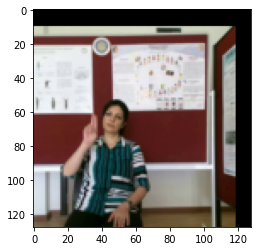

In [66]:
imgs, label = train_ds[0]
plt.imshow(denormalize(imgs[10], mean, std))

In [67]:
val_transofrmer = transforms.Compose([
                        transforms.Resize((h, w)),
                        transforms.ToTensor(),
                        transforms.Normalize(mean, std)
                        ])

val_ds = VideoDataset(imgs_name=val_X, labels=val_Y, folder="val", transform=val_transofrmer)
len(val_ds)

59

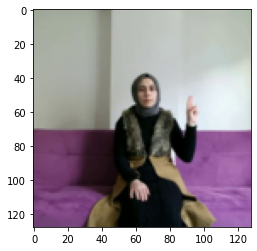

In [68]:
imgs, label = val_ds[10]
plt.imshow(denormalize(imgs[10], mean, std))

In [69]:
test_transformer = transforms.Compose([
                        transforms.Resize((h, w)),
                        transforms.ToTensor(),
                        transforms.Normalize(mean, std)
                        ])

test_ds = VideoDataset(imgs_name=my_updated_train_X, labels=my_test_Y, folder="my_test", transform=test_transformer)
len(test_ds)

81

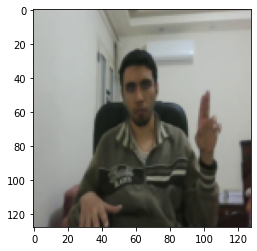

In [70]:
imgs, label = test_ds[10]
plt.imshow(denormalize(imgs[10], mean, std))

## *Create training, validation, testing dataloaders*

In [71]:
def collate_fn_r3d_18(batch):
    imgs_batch, label_batch = list(zip(*batch))
    imgs_batch = [imgs for imgs in imgs_batch if len(imgs)>0]
    label_batch = [torch.tensor(l) for l, imgs in zip(label_batch, imgs_batch) if len(imgs)>0]
    imgs_tensor = torch.stack(imgs_batch)
    imgs_tensor = torch.transpose(imgs_tensor, 2, 1)
    labels_tensor = torch.stack(label_batch)
    return imgs_tensor, labels_tensor

def collate_fn_rnn(batch):
    imgs_batch, label_batch = list(zip(*batch))
    imgs_batch = [imgs for imgs in imgs_batch if len(imgs)>0]
    label_batch = [torch.tensor(l) for l, imgs in zip(label_batch, imgs_batch) if len(imgs)>0]
    imgs_tensor = torch.stack(imgs_batch)
    labels_tensor = torch.stack(label_batch)
    return imgs_tensor,labels_tensor

batch_size = 1
if model_type == "rnn":
    train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True, collate_fn=collate_fn_rnn)
    val_dl = DataLoader(val_ds, batch_size=batch_size, shuffle=False, collate_fn=collate_fn_rnn)
    test_dl = DataLoader(test_ds, batch_size=batch_size, shuffle=False, collate_fn=collate_fn_rnn)
else:
    train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True, collate_fn=collate_fn_r3d_18)
    val_dl = DataLoader(val_ds, batch_size=batch_size, shuffle=False, collate_fn=collate_fn_r3d_18)
    test_dl = DataLoader(test_ds, batch_size=batch_size, shuffle=False, collate_fn=collate_fn_r3d_18)

In [72]:
for xb, yb in train_dl:
    print(xb.shape, yb.shape, yb[0])
    break

for xb, yb in val_dl:
    print(xb.shape, yb.shape, yb[0])
    break

for xb, yb in test_dl:
    print(xb.shape, yb.shape, yb[0])
    break

torch.Size([1, 3, 16, 128, 128]) torch.Size([1]) tensor(1)
torch.Size([1, 3, 15, 128, 128]) torch.Size([1]) tensor(0)
torch.Size([1, 3, 16, 128, 128]) torch.Size([1]) tensor(0)


## *Testing the model*

In [ ]:
import torch.nn as nn
from collections import OrderedDict

model = r2plus1d_18(pretrained=True, n_classes=500)
checkpoint = torch.load("/content/drive/MyDrive/slr_resnet2d+1.pth")
new_state_dict = OrderedDict()
for k, v in checkpoint.items():
    name = k[7:]
    new_state_dict[name] = v
model.load_state_dict(new_state_dict)
model.fc1 = nn.Linear(model.fc1.in_features, n_classes)
model

In [80]:
with torch.no_grad():
    x = torch.zeros(1, 3, 16, h, w)
    y = model(x)
    print(y.shape)

torch.Size([1, 3])


In [81]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [82]:
path_to_weights = "weights.pt"
torch.save(model.state_dict(), path_to_weights)

## *Model Training*

In [83]:
from torch import optim
from torch.optim.lr_scheduler import CosineAnnealingLR, ReduceLROnPlateau

loss_fn = nn.CrossEntropyLoss(reduction="sum")
opt = optim.Adam(model.parameters(), lr=3e-5)
lr_scheduler = ReduceLROnPlateau(opt, mode="min", factor=0.5, patience=5, verbose=1)
os.makedirs(".\models", exist_ok=True)

params_train = {
    "num_epochs": 100,
    "opt": opt,
    "loss_func": loss_fn,
    "train_dl": train_dl,
    "val_dl": val_dl,
    "lr_scheduler": lr_scheduler,
    "path_to_weights": "weights_"+model_type+ "_v" + str(WEIGHTS_V) + ".pt"
}

In [84]:
!nvidia-smi

Wed Dec 22 16:30:45 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0    40W / 250W |   3851MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [85]:
WEIGHTS_V += 1
model, loss_hist, metric_hist = train_val(model, **params_train)

Epoch 0/99, current lr=3e-05
Copied best model weights!
train loss: 0.966472, train_accuracy: 50.27, val_loss: 0.888487, val_accuracy: 57.63
----------
Epoch 1/99, current lr=3e-05
Copied best model weights!
train loss: 0.335042, train_accuracy: 93.05, val_loss: 0.232622, val_accuracy: 93.22
----------
Epoch 2/99, current lr=3e-05
train loss: 0.231166, train_accuracy: 94.39, val_loss: 0.326073, val_accuracy: 88.14
----------
Epoch 3/99, current lr=3e-05
Copied best model weights!
train loss: 0.100718, train_accuracy: 98.93, val_loss: 0.086591, val_accuracy: 96.61
----------
Epoch 4/99, current lr=3e-05
Copied best model weights!
train loss: 0.132134, train_accuracy: 97.06, val_loss: 0.079235, val_accuracy: 96.61
----------
Epoch 5/99, current lr=3e-05
train loss: 0.116117, train_accuracy: 97.33, val_loss: 0.096504, val_accuracy: 93.22
----------
Epoch 6/99, current lr=3e-05
train loss: 0.056560, train_accuracy: 99.47, val_loss: 0.094597, val_accuracy: 93.22
----------
Epoch 7/99, curre

In [ ]:
metric_hist

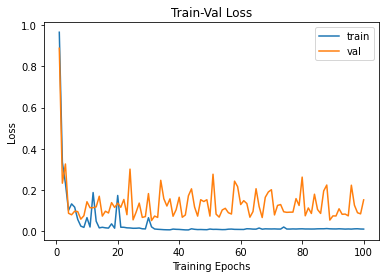

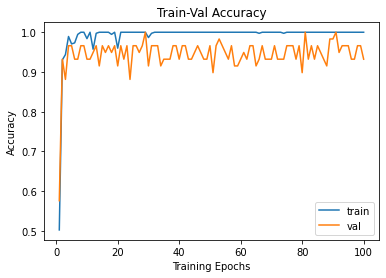

In [87]:
plot_loss(loss_hist, metric_hist)

## Model Testing

#### 1. *Load pretrained weights*

In [73]:
import torch

import torch.nn as nn
from collections import OrderedDict

m = r2plus1d_18(pretrained=False, n_classes=3)
w = torch.load("weights_3dcnn_v24.pt")
m.load_state_dict(w)

<All keys matched successfully>

In [75]:
loss_fn = nn.CrossEntropyLoss(reduction="sum")

params_test = {
    "model": m,
    "loss_func": loss_fn,
    "dataset_dl": test_dl
}

In [76]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

with torch.no_grad():
    m.eval()
    testing_loss, testing_metric = loss_epoch(**params_test)

print("dev loss: %.6f, accuracy: %.2f" %(testing_loss,100*testing_metric))

dev loss: 1.371722, accuracy: 55.56


In [166]:
my_test_transformer = transforms.Compose([
                        transforms.Resize((h, w)),
                        transforms.ToTensor(),
                        transforms.Normalize(mean, std)
                        ])



## Try Real time

In [146]:
from scipy import stats

colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        prob = max(0,prob)
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame


In [94]:
m.cuda()

r2plus1d_18(
  (r2plus1d_18): Sequential(
    (0): R2Plus1dStem(
      (0): Conv3d(3, 45, kernel_size=(1, 7, 7), stride=(1, 2, 2), padding=(0, 3, 3), bias=False)
      (1): BatchNorm3d(45, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
      (3): Conv3d(45, 64, kernel_size=(3, 1, 1), stride=(1, 1, 1), padding=(1, 0, 0), bias=False)
      (4): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): BasicBlock(
        (conv1): Sequential(
          (0): Conv2Plus1D(
            (0): Conv3d(64, 144, kernel_size=(1, 3, 3), stride=(1, 1, 1), padding=(0, 1, 1), bias=False)
            (1): BatchNorm3d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
            (3): Conv3d(144, 64, kernel_size=(3, 1, 1), stride=(1, 1, 1), padding=(1, 0, 0), bias=False)
          )
          (1): BatchNorm3d(64, eps=

In [96]:
next(model.parameters()).is_cuda

True

In [147]:
# 1. New detection variables
from PIL import Image

sequence = []
sentence = []
predictions = []
threshold = 0.5

# model = m.to(device)
cap = cv2.VideoCapture(0)
# Set mediapipe model 



resize_transform   = transforms.Resize((h, w))
totensor_transform  = transforms.ToTensor()
normalize_transform = transforms.Normalize(mean, std)

while cap.isOpened():

    # Read feed
    ret, frame = cap.read()
    if(not ret):
        break
#         frame = cv2.resize(frame, (512, 512))


    final_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    final_frame = Image.fromarray(final_frame)
    
    

    final_frame = resize_transform(final_frame)
    final_frame = totensor_transform(final_frame)
    final_frame = normalize_transform(final_frame).to(device)
    
    
    
    sequence.append(final_frame)
    sequence = sequence[-16:]
    arg_max=-1
    if len(sequence) == 16:
        first_seq = torch.stack(sequence).to(device)
        output_seq = torch.unsqueeze(first_seq, dim=0).permute(0, 2, 1, 3, 4)
        with torch.no_grad():
            res = m(output_seq)
            arg_max = int(torch.argmax(res))
        predictions.append(arg_max)


    #3. Viz logic
        if np.unique(predictions[-2:])[0]==arg_max: 
            if res[0][arg_max] > threshold: 

                if len(sentence) > 0: 
                    if actions[arg_max] != sentence[-1]:
                        sentence.append(actions[arg_max])
                else:
                    sentence.append(actions[arg_max])

        if len(sentence) > 5: 
            sentence = sentence[-5:]

        # Viz probabilities
        frame = prob_viz(res.cpu().detach().numpy()[0], actions, frame, colors)

    cv2.rectangle(frame, (0,0), (640, 40), (245, 117, 16), -1)
    cv2.putText(frame, ' '.join(sentence), (3,30), 
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    # Show to screen
    cv2.imshow('OpenCV Feed', frame)

    # Break gracefully
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [138]:
cap.release()


In [139]:
cv2.destroyAllWindows()

In [128]:
frame.shape

(480, 640, 3)

array([ 0.7863796, -1.7930923,  0.4524451], dtype=float32)

In [253]:
gc.collect()

8795

In [300]:
torch.cuda.empty_cache()